## Galaxy Zoo

Using data science techniques to analyze galaxy zoo data. Characterize galaxies as elliptical vs spiral.

Data reference: https://data.galaxyzoo.org/

Data description reference: https://data.galaxyzoo.org/data/candels/gzc_table2_description.txt

Works Cited:
Simmons et al. (2017) https://ui.adsabs.harvard.edu/abs/2017MNRAS.464.4176W/abstract

#### Import the data:

-analyzing how much data, what data contains, etc.

-seperate data into columns you want to analyze

-split data on training/test data

In [1]:
import pandas as pd
df = pd.read_csv("gz_candels_table_2_main_release.csv")

In [2]:
df.head(10)

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False
5,COS_10004,150.06645,2.299418,40.0,35.271465,0.350000,0.050000,0.600000,0.454243,0.046038,...,0.729367,16.0,15.081565,False,False,False,False,False,False,False
6,COS_10005,150.18800,2.298331,38.0,36.774732,0.657895,0.131579,0.210526,0.752343,0.191280,...,0.678551,30.0,29.444238,False,False,False,False,False,False,False
7,COS_10006,150.13602,2.298921,74.0,67.061451,0.459459,0.283784,0.256757,0.538340,0.374873,...,0.408652,55.0,53.525583,False,False,False,False,False,False,False
8,COS_10007,150.19403,2.299470,38.0,35.108332,0.473684,0.157895,0.368421,0.619871,0.155235,...,0.870106,24.0,23.095752,False,False,False,False,False,False,False
9,COS_10008,150.13625,2.299512,39.0,36.307816,0.538462,0.102564,0.358974,0.724913,0.142772,...,0.845573,25.0,25.902273,False,False,False,False,False,False,True


In [3]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 49555 samles.


In [4]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))
list(df)

Data contains 146 columns


['ID',
 'RA',
 'Dec',
 'num_classifications',
 'num_classifications_weighted',
 't00_smooth_or_featured_a0_smooth_frac',
 't00_smooth_or_featured_a1_features_frac',
 't00_smooth_or_featured_a2_artifact_frac',
 't00_smooth_or_featured_a0_smooth_weighted_frac',
 't00_smooth_or_featured_a1_features_weighted_frac',
 't00_smooth_or_featured_a2_artifact_weighted_frac',
 't00_smooth_or_featured_count',
 't00_smooth_or_featured_weight',
 't01_how_rounded_a0_completely_frac',
 't01_how_rounded_a1_inbetween_frac',
 't01_how_rounded_a2_cigarshaped_frac',
 't01_how_rounded_a0_completely_weighted_frac',
 't01_how_rounded_a1_inbetween_weighted_frac',
 't01_how_rounded_a2_cigarshaped_weighted_frac',
 't01_how_rounded_count',
 't01_how_rounded_weight',
 't02_clumpy_appearance_a0_yes_frac',
 't02_clumpy_appearance_a1_no_frac',
 't02_clumpy_appearance_a0_yes_weighted_frac',
 't02_clumpy_appearance_a1_no_weighted_frac',
 't02_clumpy_appearance_count',
 't02_clumpy_appearance_weight',
 't03_how_many_clump

In [5]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 49555 rows, 146 columns


In [6]:
df.dtypes

ID                                                         object
RA                                                        float64
Dec                                                       float64
num_classifications                                       float64
num_classifications_weighted                              float64
t00_smooth_or_featured_a0_smooth_frac                     float64
t00_smooth_or_featured_a1_features_frac                   float64
t00_smooth_or_featured_a2_artifact_frac                   float64
t00_smooth_or_featured_a0_smooth_weighted_frac            float64
t00_smooth_or_featured_a1_features_weighted_frac          float64
t00_smooth_or_featured_a2_artifact_weighted_frac          float64
t00_smooth_or_featured_count                              float64
t00_smooth_or_featured_weight                             float64
t01_how_rounded_a0_completely_frac                        float64
t01_how_rounded_a1_inbetween_frac                         float64
t01_how_ro

In [7]:
df[0:5]

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False


In [8]:
data = df[['t00_smooth_or_featured_a0_smooth_frac', 't00_smooth_or_featured_a1_features_frac', 
           't01_how_rounded_a0_completely_frac', 't01_how_rounded_a2_cigarshaped_frac', 
           't02_clumpy_appearance_a0_yes_frac', 't02_clumpy_appearance_a1_no_frac', 
           't12_spiral_pattern_a0_yes_frac', 't12_spiral_pattern_a1_no_frac']]
data.head(5)

,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t01_how_rounded_a0_completely_frac,t01_how_rounded_a2_cigarshaped_frac,t02_clumpy_appearance_a0_yes_frac,t02_clumpy_appearance_a1_no_frac,t12_spiral_pattern_a0_yes_frac,t12_spiral_pattern_a1_no_frac
0,0.026316,0.078947,0.0000,0.000000,1.000000,0.000000,0.0,0.0
1,0.128205,0.025641,0.6000,0.000000,0.000000,1.000000,0.0,0.0
2,0.644737,0.250000,0.0000,0.122449,0.263158,0.736842,0.0,1.0
3,0.512821,0.051282,0.8000,0.000000,0.500000,0.500000,0.0,1.0
4,0.444444,0.083333,0.5625,0.000000,0.333333,0.666667,0.5,0.5


In [9]:
data_weighted = df[['t00_smooth_or_featured_a0_smooth_weighted_frac', 't00_smooth_or_featured_a1_features_weighted_frac', 
           't01_how_rounded_a0_completely_weighted_frac', 't01_how_rounded_a2_cigarshaped_weighted_frac', 
           't02_clumpy_appearance_a0_yes_weighted_frac', 't02_clumpy_appearance_a1_no_weighted_frac', 
           't12_spiral_pattern_a0_yes_weighted_frac', 't12_spiral_pattern_a1_no_weighted_frac']]
data_weighted.head(5)

,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,t01_how_rounded_a0_completely_weighted_frac,t01_how_rounded_a2_cigarshaped_weighted_frac,t02_clumpy_appearance_a0_yes_weighted_frac,t02_clumpy_appearance_a1_no_weighted_frac,t12_spiral_pattern_a0_yes_weighted_frac,t12_spiral_pattern_a1_no_weighted_frac
0,0.000883,0.059558,0.000000,0.000000,1.000000,0.000000,0.0,0.0
1,0.137607,0.041204,0.559490,0.000000,0.000000,1.000000,0.0,0.0
2,0.714415,0.268447,0.000000,0.117855,0.249677,0.750323,0.0,1.0
3,0.727801,0.108449,0.819792,0.000000,0.500000,0.500000,0.0,1.0
4,0.702102,0.082279,0.555807,0.000000,0.137242,0.862758,0.5,0.5


In [10]:
#training data
train = df.head(39644)
train_frac = data.head(39644)
train_weighted = data_weighted.head(39644)

In [11]:
#testing data
test = df.head(9911)
test_frac = data.head(9911)
test_weighted = data_weighted.head(9911)

### Explore the data

-graphs based on number of votes/classification

In [12]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(df['num_classifications'], bins=100)
plt.show
#as seen below, most galaxies have ~18, 37, or 76 classifications

<function matplotlib.pyplot.show(*args, **kw)>

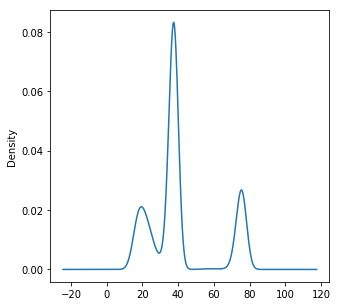

In [13]:
df['num_classifications'].plot(kind="density", figsize=(5,5))

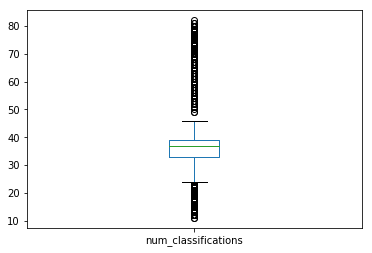

In [14]:
df['num_classifications'].plot(kind="box")

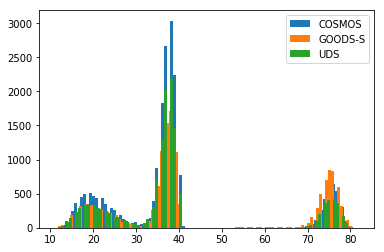

In [15]:
plt.hist(df[df['ID'].str.contains('COS')]['num_classifications'], label='COSMOS', bins=100)
plt.hist(df[df['ID'].str.contains('GDS')]['num_classifications'], label='GOODS-S', bins=100)
plt.hist(df[df['ID'].str.contains('UDS')]['num_classifications'], label='UDS', bins=100)
plt.legend()
plt.show()

### Use a distance metric and an unsupervised algorithm to cluster the data

#### Anomoly detection using DBSCAN?

-sklearn implementation

Levenshtein information

Help with unsupervised learning: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/

mini batch k-means: http://benalexkeen.com/k-means-clustering-in-python/

k-means: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [17]:
#Binary Classification - not sure this is necessary?

y = df.iloc[:,145] #vector of the columns
X = df.iloc[:,1:145] #matrix of explanatory variables (data), 1 removes ID column

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)
LR.predict(X.iloc[460:,:]) #predict probabilities of new data
round(LR.score(X,y), 4) #mean prediction accuracy
#0.9766

from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X.iloc[460:,:])
round(SVM.score(X,y), 4)
#0.9768

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
RF.predict(X.iloc[460:,:])
round(RF.score(X,y), 4)
#0.9768

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)
NN.predict(X.iloc[460:,:])
round(NN.score(X,y), 4)
#0.9768

(-15, 15)

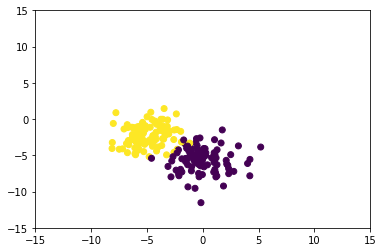

In [31]:
#test

from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [29]:
# import KMeans
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(X) #X = data set excluding label of galaxy
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[ 4.39581766e+01 -1.67571330e+01  4.19845619e+01  4.01949393e+01
   4.70694568e-01  1.49037541e-01  3.80267891e-01  6.10598897e-01
   1.78338281e-01  2.11062823e-01  4.19845619e+01  4.62841614e+01
   4.37698668e-01  4.67307841e-01  8.77345197e-02  4.37702601e-01
   4.67967208e-01  8.70712196e-02  2.04498858e+01  2.06412751e+01
   5.51950084e-01  4.13424962e-01  5.54826991e-01  4.10548056e-01
   7.14091947e+00  6.83561485e+00  2.53633424e-01  1.66086571e-01
   9.08102023e-02  3.65473098e-02  6.56573280e-02  2.59756049e-01
   2.56703130e-01  1.65773368e-01  9.04914721e-02  3.61270625e-02
   6.43680854e-02  2.59027766e-01  3.86828204e+00  3.72321641e+00
   9.88363445e-02  1.12659665e-01  3.72710798e-01  1.04884287e-01
   9.92287352e-02  1.11388324e-01  3.74792799e-01  1.03681237e-01
   2.10922537e+00  2.01979110e+00  3.69351802e-01  4.04768090e-01
   3.65273752e-01  4.08846140e-01  2.99594452e+00  2.87680967e+00
   3.19648027e-01  2.34214904e-01  3.18099347e-01  2.35763584e-01
   1.46583

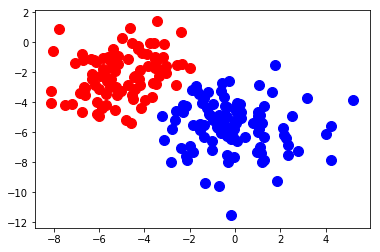

In [33]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='blue')

In [41]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from sklearn.cluster import MiniBatchKMeans
MiniBatchKMeans(n_clusters=2)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [2]:
import numpy as np
np.random.seed(42)